In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
path = "dataset.csv"
df = pd.read_csv(path)

print("="*60)
print("VEHICLE PRICE PREDICTION - INITIAL DATA ASSESSMENT")
print("="*60)

# Basic dataset information
print(f"\n1. DATASET SHAPE:")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")

print(f"\n2. COLUMN INFORMATION:")
print(df.dtypes)

print(f"\n3. MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)
print(missing_summary[missing_summary['Missing_Count'] > 0])

print(f"\n4. FIRST 5 ROWS:")
print(df.head())

print(f"\n5. BASIC STATISTICS (NUMERICAL COLUMNS):")
print(df.describe())

print(f"\n6. UNIQUE VALUES IN CATEGORICAL COLUMNS:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"   {col}: {df[col].nunique()} unique values")

print(f"\n7. TARGET VARIABLE (PRICE) SUMMARY:")
if 'price' in df.columns:
    print(f"   Min Price: ${df['price'].min():,.2f}")
    print(f"   Max Price: ${df['price'].max():,.2f}")
    print(f"   Mean Price: ${df['price'].mean():,.2f}")
    print(f"   Median Price: ${df['price'].median():,.2f}")
    print(f"   Standard Deviation: ${df['price'].std():,.2f}")

# Save key information for next steps
dataset_info = {
    'shape': df.shape,
    'missing_summary': missing_summary,
    'categorical_cols': list(categorical_cols),
    'numerical_cols': list(df.select_dtypes(include=[np.number]).columns)
}

print(f"\n8. MEMORY USAGE:")
print(f"   Total Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "="*60)
print("INITIAL ASSESSMENT COMPLETED")
print("="*60)

VEHICLE PRICE PREDICTION - INITIAL DATA ASSESSMENT

1. DATASET SHAPE:
   Rows: 1,002
   Columns: 17

2. COLUMN INFORMATION:
name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

3. MISSING VALUES:
                Missing_Count  Missing_Percentage
cylinders                 105           10.479042
description                56            5.588822
interior_color             38            3.792415
mileage                    34            3.393214
price                      23            2.295409
fuel                        7            0.698603
doors                       7            0.698603


PHASE 1.2: TARGET VARIABLE (PRICE) ANALYSIS
1. PRICE DATA QUALITY CHECK:
   Total records: 1002
   Records with price: 979
   Missing prices: 23
   Zero prices: 1

   Vehicles with $0 price:
                          name  make model  year  price
94  2024 Audi SQ5 Premium Plus  Audi   SQ5  2024    0.0
   Clean price records: 978

2. CLEAN PRICE STATISTICS:
   Min Price: $17,994.00
   Max Price: $195,895.00
   Mean Price: $50,254.32
   Median Price: $47,170.00
   Q1 (25%): $36,633.50
   Q3 (75%): $58,924.75
   Standard Deviation: $18,640.82

3. OUTLIER ANALYSIS (IQR Method):
   Lower bound: $3,196.62
   Upper bound: $92,361.62
   Number of outliers: 25
   Outlier percentage: 2.56%

4. NORMALITY TEST (Shapiro-Wilk):
   Statistic: 0.9095
   P-value: 1.1678e-23
   Distribution is Not Normal


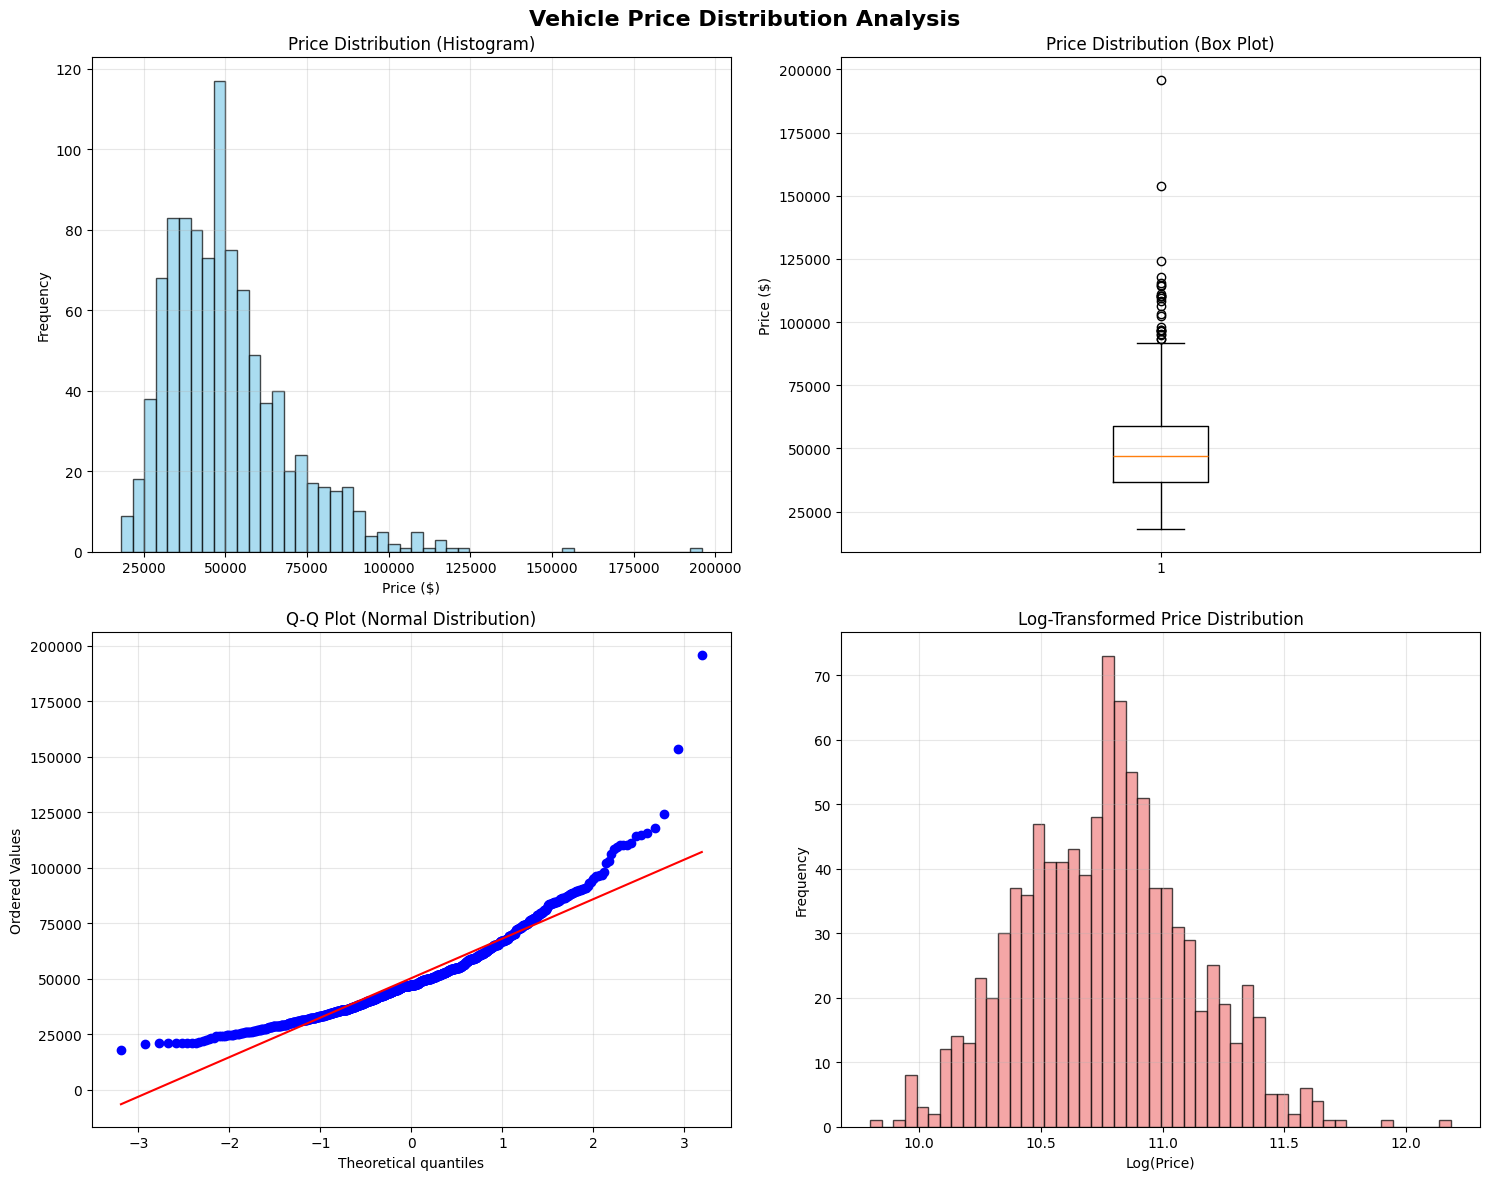


5. LOG-TRANSFORMED NORMALITY TEST:
   Statistic: 0.9960
   P-value: 1.3536e-02
   Log-transformed distribution is Not Normal

6. PRICE RANGE BREAKDOWN:
   Budget (<$30K): 88 vehicles (9.0%)
   Mid-range ($30K-$50K): 481 vehicles (49.2%)
   Premium ($50K-$75K): 311 vehicles (31.8%)
   Luxury ($75K-$100K): 82 vehicles (8.4%)
   Ultra-luxury (>$100K): 16 vehicles (1.6%)

7. DATA SAVED:
   Clean dataset saved as 'vehicle_data_clean_price.csv'
   Records in clean dataset: 978

TARGET VARIABLE ANALYSIS COMPLETED


In [2]:
# Continue from previous step - load data again for consistency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset
path = "F:/Projects/Vehicle Price Prediction/dataset.csv"
df = pd.read_csv(path)

print("="*60)
print("PHASE 1.2: TARGET VARIABLE (PRICE) ANALYSIS")
print("="*60)

# Remove rows with missing prices for analysis
df_price_analysis = df.dropna(subset=['price']).copy()

print(f"1. PRICE DATA QUALITY CHECK:")
print(f"   Total records: {len(df)}")
print(f"   Records with price: {len(df_price_analysis)}")
print(f"   Missing prices: {len(df) - len(df_price_analysis)}")

# Check for zero prices
zero_prices = df_price_analysis[df_price_analysis['price'] == 0]
print(f"   Zero prices: {len(zero_prices)}")

if len(zero_prices) > 0:
    print("\n   Vehicles with $0 price:")
    print(zero_prices[['name', 'make', 'model', 'year', 'price']].head())

# Filter out zero prices for meaningful analysis
df_clean_price = df_price_analysis[df_price_analysis['price'] > 0].copy()
print(f"   Clean price records: {len(df_clean_price)}")

print(f"\n2. CLEAN PRICE STATISTICS:")
print(f"   Min Price: ${df_clean_price['price'].min():,.2f}")
print(f"   Max Price: ${df_clean_price['price'].max():,.2f}")
print(f"   Mean Price: ${df_clean_price['price'].mean():,.2f}")
print(f"   Median Price: ${df_clean_price['price'].median():,.2f}")
print(f"   Q1 (25%): ${df_clean_price['price'].quantile(0.25):,.2f}")
print(f"   Q3 (75%): ${df_clean_price['price'].quantile(0.75):,.2f}")
print(f"   Standard Deviation: ${df_clean_price['price'].std():,.2f}")

# Outlier detection using IQR method
Q1 = df_clean_price['price'].quantile(0.25)
Q3 = df_clean_price['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean_price[(df_clean_price['price'] < lower_bound) | 
                         (df_clean_price['price'] > upper_bound)]

print(f"\n3. OUTLIER ANALYSIS (IQR Method):")
print(f"   Lower bound: ${lower_bound:,.2f}")
print(f"   Upper bound: ${upper_bound:,.2f}")
print(f"   Number of outliers: {len(outliers)}")
print(f"   Outlier percentage: {len(outliers)/len(df_clean_price)*100:.2f}%")

# Normality test
shapiro_stat, shapiro_p = stats.shapiro(df_clean_price['price'].sample(min(5000, len(df_clean_price))))
print(f"\n4. NORMALITY TEST (Shapiro-Wilk):")
print(f"   Statistic: {shapiro_stat:.4f}")
print(f"   P-value: {shapiro_p:.4e}")
print(f"   Distribution is {'Normal' if shapiro_p > 0.05 else 'Not Normal'}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Vehicle Price Distribution Analysis', fontsize=16, fontweight='bold')

# Histogram
axes[0, 0].hist(df_clean_price['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Price Distribution (Histogram)')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df_clean_price['price'])
axes[0, 1].set_title('Price Distribution (Box Plot)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot for normality
stats.probplot(df_clean_price['price'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 0].grid(True, alpha=0.3)

# Log-transformed distribution
log_prices = np.log(df_clean_price['price'])
axes[1, 1].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Log-Transformed Price Distribution')
axes[1, 1].set_xlabel('Log(Price)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Test log-normal distribution
log_shapiro_stat, log_shapiro_p = stats.shapiro(log_prices.sample(min(5000, len(log_prices))))
print(f"\n5. LOG-TRANSFORMED NORMALITY TEST:")
print(f"   Statistic: {log_shapiro_stat:.4f}")
print(f"   P-value: {log_shapiro_p:.4e}")
print(f"   Log-transformed distribution is {'Normal' if log_shapiro_p > 0.05 else 'Not Normal'}")

# Price ranges analysis
print(f"\n6. PRICE RANGE BREAKDOWN:")
price_ranges = [
    (0, 30000, "Budget (<$30K)"),
    (30000, 50000, "Mid-range ($30K-$50K)"),
    (50000, 75000, "Premium ($50K-$75K)"),
    (75000, 100000, "Luxury ($75K-$100K)"),
    (100000, float('inf'), "Ultra-luxury (>$100K)")
]

for min_price, max_price, label in price_ranges:
    count = len(df_clean_price[(df_clean_price['price'] >= min_price) & 
                              (df_clean_price['price'] < max_price)])
    percentage = count / len(df_clean_price) * 100
    print(f"   {label}: {count} vehicles ({percentage:.1f}%)")

# Save cleaned data and analysis results for next phase
analysis_results = {
    'total_records': len(df),
    'clean_price_records': len(df_clean_price),
    'zero_prices': len(zero_prices),
    'outliers_count': len(outliers),
    'price_stats': {
        'mean': df_clean_price['price'].mean(),
        'median': df_clean_price['price'].median(),
        'std': df_clean_price['price'].std(),
        'min': df_clean_price['price'].min(),
        'max': df_clean_price['price'].max()
    },
    'is_normal': shapiro_p > 0.05,
    'log_is_normal': log_shapiro_p > 0.05
}

# Save clean dataset for next steps
df_clean_price.to_csv('vehicle_data_clean_price.csv', index=False)
print(f"\n7. DATA SAVED:")
print(f"   Clean dataset saved as 'vehicle_data_clean_price.csv'")
print(f"   Records in clean dataset: {len(df_clean_price)}")

print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS COMPLETED")
print("="*60)

PHASE 1.3: FEATURE-WISE EXPLORATION
Working with 978 clean records

1. CATEGORICAL FEATURES IMPACT ON PRICE:
--------------------------------------------------
Top 10 Makes by Average Price:
    1. BMW            : $  91,366 (n= 18)
    2. Mercedes-Benz  : $  81,110 (n= 26)
    3. Audi           : $  79,318 (n= 15)
    4. Jaguar         : $  77,053 (n=  1)
    5. Lexus          : $  73,270 (n=  1)
    6. Genesis        : $  71,008 (n=  2)
    7. RAM            : $  68,712 (n= 77)
    8. Volvo          : $  65,127 (n=  3)
    9. Land Rover     : $  63,163 (n=  4)
   10. GMC            : $  61,221 (n= 23)

Fuel Type Impact:
   Diesel         : $  72,435 ± $10,535 (n= 72)
   Diesel (B20 capable): $  87,075 ± $   nan (n=  1)
   E85 Flex Fuel  : $  52,979 ± $ 1,872 (n=  5)
   Electric       : $  63,303 ± $26,862 (n= 96)
   Gasoline       : $  46,117 ± $16,498 (n=646)
   Hybrid         : $  47,689 ± $12,480 (n=135)
   PHEV Hybrid Fuel: $  55,392 ± $ 2,878 (n= 16)

Body Type Impact:
   Pickup

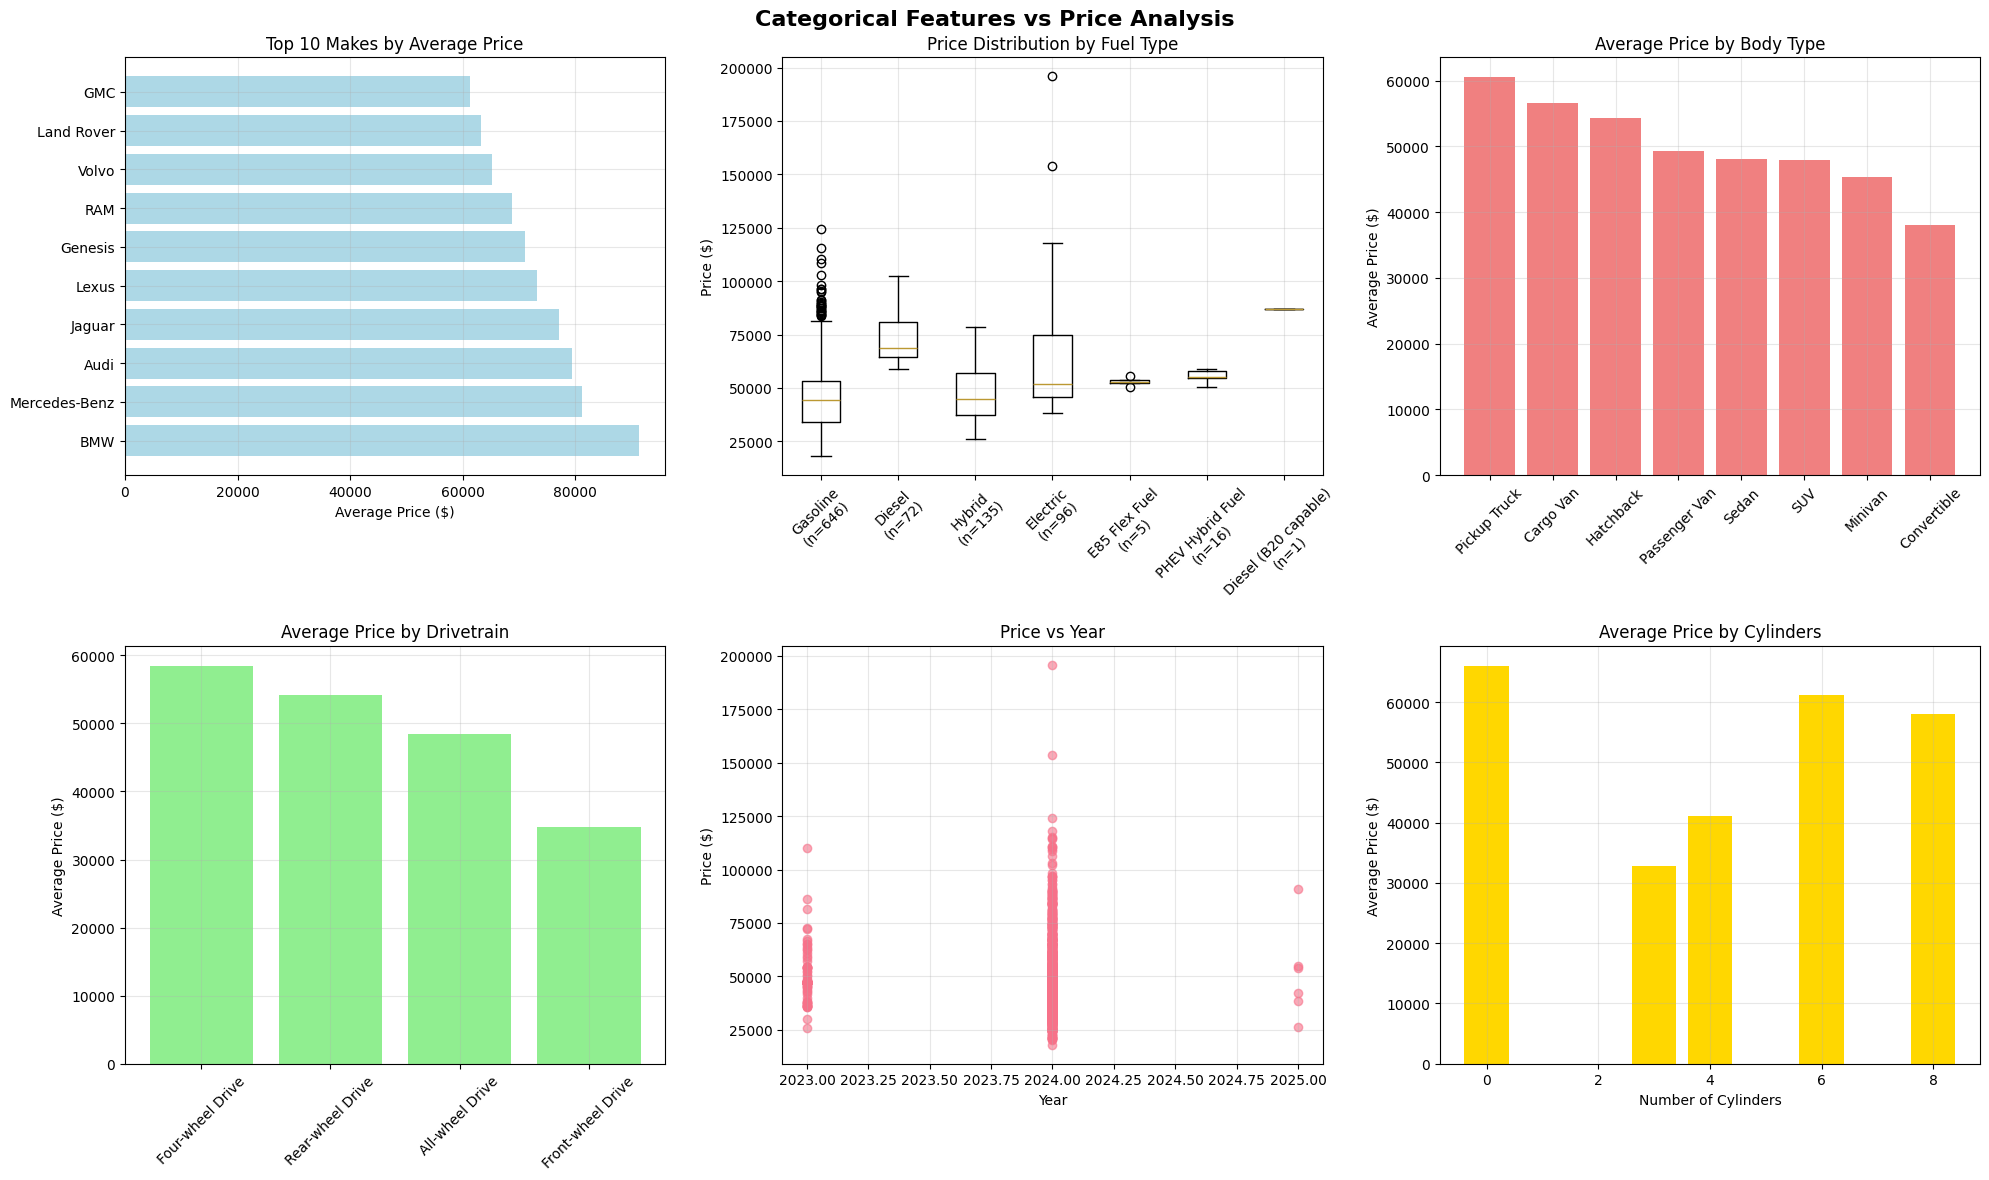


3. MILEAGE ANALYSIS:
--------------------------------------------------
Records with mileage data: 944
Mileage Statistics:
   Min: 0 miles
   Max: 9,711 miles
   Mean: 67 miles
   Median: 8 miles

Price by Mileage Category:
   New (0-10)          : $  50,300 ± $18,461 (n=513)
   Nearly New (10-50)  : $  48,600 ± $16,694 (n=270)
   Low (50-100)        : $  54,147 ± $19,546 (n= 15)
   Medium (100-500)    : $  59,338 ± $19,954 (n= 22)
   High (500+)         : $  64,632 ± $26,477 (n= 15)

4. CORRELATION MATRIX (NUMERICAL FEATURES):
--------------------------------------------------


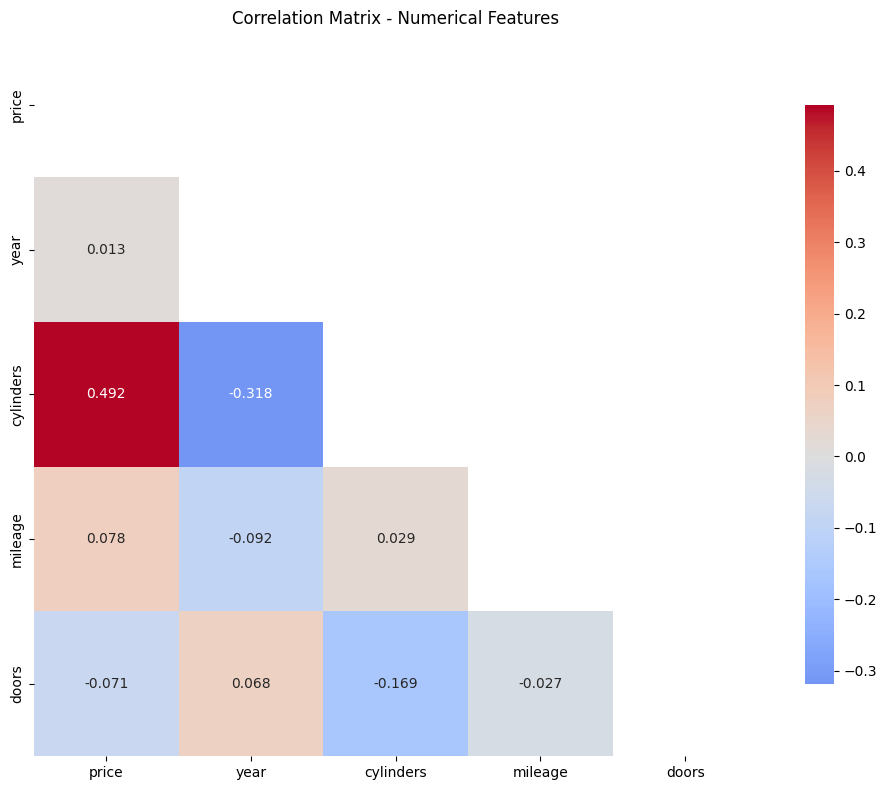


5. KEY INSIGHTS SUMMARY:
--------------------------------------------------
Strongest numerical correlations with price:
   cylinders: 0.492 (positively correlated)

FEATURE-WISE EXPLORATION COMPLETED


In [8]:
# Load clean dataset from previous step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Load clean dataset
df = pd.read_csv('vehicle_data_clean_price.csv')

print("="*70)
print("PHASE 1.3: FEATURE-WISE EXPLORATION")
print("="*70)

print(f"Working with {len(df)} clean records\n")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. CATEGORICAL FEATURES ANALYSIS
print("1. CATEGORICAL FEATURES IMPACT ON PRICE:")
print("-" * 50)

categorical_features = ['make', 'fuel', 'transmission', 'body', 'drivetrain']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Categorical Features vs Price Analysis', fontsize=16, fontweight='bold')

# Make vs Price
make_price = df.groupby('make')['price'].agg(['count', 'mean', 'median']).sort_values('mean', ascending=False)
top_makes = make_price.head(10)

axes[0, 0].barh(range(len(top_makes)), top_makes['mean'], color='lightblue')
axes[0, 0].set_yticks(range(len(top_makes)))
axes[0, 0].set_yticklabels(top_makes.index)
axes[0, 0].set_title('Top 10 Makes by Average Price')
axes[0, 0].set_xlabel('Average Price ($)')
axes[0, 0].grid(True, alpha=0.3)

print("Top 10 Makes by Average Price:")
for i, (make, data) in enumerate(top_makes.head(10).iterrows()):
    print(f"   {i+1:2d}. {make:15s}: ${data['mean']:8,.0f} (n={int(data['count']):3d})")

# Fuel Type vs Price
fuel_stats = df.groupby('fuel')['price'].agg(['count', 'mean', 'std'])
fuel_stats[['mean', 'std']] = fuel_stats[['mean', 'std']].round(0)
axes[0, 1].boxplot([df[df['fuel'] == fuel]['price'] for fuel in df['fuel'].unique() if pd.notna(fuel)],
                   labels=[f'{fuel}\n(n={fuel_stats.loc[fuel, "count"]})' for fuel in df['fuel'].unique() if pd.notna(fuel)])
axes[0, 1].set_title('Price Distribution by Fuel Type')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

print(f"\nFuel Type Impact:")
for fuel, data in fuel_stats.iterrows():
    print(f"   {fuel:15s}: ${data['mean']:8,.0f} ± ${data['std']:6,.0f} (n={int(data['count']):3d})")

# Body Type vs Price
body_stats = df.groupby('body')['price'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
body_stats[['mean', 'std']] = body_stats[['mean', 'std']].round(0)
axes[0, 2].bar(range(len(body_stats)), body_stats['mean'], color='lightcoral')
axes[0, 2].set_xticks(range(len(body_stats)))
axes[0, 2].set_xticklabels(body_stats.index, rotation=45)
axes[0, 2].set_title('Average Price by Body Type')
axes[0, 2].set_ylabel('Average Price ($)')
axes[0, 2].grid(True, alpha=0.3)

print(f"\nBody Type Impact:")
for body, data in body_stats.iterrows():
    count_val = int(data['count'])
    mean_val = data['mean']
    std_val = data['std']
    print(f"   {body:15s}: ${mean_val:8,.0f} ± ${std_val:6,.0f} (n={count_val:3d})")

# Drivetrain vs Price
drivetrain_stats = df.groupby('drivetrain')['price'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)
drivetrain_stats[['mean', 'std']] = drivetrain_stats[['mean', 'std']].round(0)
axes[1, 0].bar(range(len(drivetrain_stats)), drivetrain_stats['mean'], color='lightgreen')
axes[1, 0].set_xticks(range(len(drivetrain_stats)))
axes[1, 0].set_xticklabels(drivetrain_stats.index, rotation=45)
axes[1, 0].set_title('Average Price by Drivetrain')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].grid(True, alpha=0.3)

print(f"\nDrivetrain Impact:")
for drivetrain, data in drivetrain_stats.iterrows():
    count_val = int(data['count'])
    mean_val = data['mean']
    std_val = data['std']
    print(f"   {drivetrain:20s}: ${mean_val:8,.0f} ± ${std_val:6,.0f} (n={count_val:3d})")

# 2. NUMERICAL FEATURES ANALYSIS
print(f"\n2. NUMERICAL FEATURES CORRELATION WITH PRICE:")
print("-" * 50)

numerical_features = ['year', 'cylinders', 'mileage', 'doors']
correlations = {}

for feature in numerical_features:
    if feature in df.columns:
        clean_data = df[[feature, 'price']].dropna()
        if len(clean_data) > 10:
            corr = clean_data[feature].corr(clean_data['price'])
            correlations[feature] = corr
            print(f"   {feature:15s}: {corr:6.3f}")

# Year vs Price scatter plot
year_clean = df[['year', 'price']].dropna()
axes[1, 1].scatter(year_clean['year'], year_clean['price'], alpha=0.6)
axes[1, 1].set_title('Price vs Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].grid(True, alpha=0.3)

# Cylinders vs Price
cyl_clean = df[['cylinders', 'price']].dropna()
cyl_stats = cyl_clean.groupby('cylinders')['price'].agg(['count', 'mean', 'std'])
axes[1, 2].bar(cyl_stats.index, cyl_stats['mean'], color='gold')
axes[1, 2].set_title('Average Price by Cylinders')
axes[1, 2].set_xlabel('Number of Cylinders')
axes[1, 2].set_ylabel('Average Price ($)')
axes[1, 2].grid(True, alpha=0.3)

print(f"\nCylinders Impact:")
for cyl, data in cyl_stats.iterrows():
    count_val = int(data['count'])
    if count_val >= 5:  # Only show if sufficient data
        mean_val = data['mean']
        std_val = data['std']
        print(f"   {cyl:3.0f} cylinders: ${mean_val:8,.0f} ± ${std_val:6,.0f} (n={count_val:3d})")

plt.tight_layout()
plt.savefig('feature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. MILEAGE ANALYSIS
print(f"\n3. MILEAGE ANALYSIS:")
print("-" * 50)

mileage_clean = df[['mileage', 'price']].dropna()
print(f"Records with mileage data: {len(mileage_clean)}")

# Mileage statistics
print(f"Mileage Statistics:")
print(f"   Min: {mileage_clean['mileage'].min():,.0f} miles")
print(f"   Max: {mileage_clean['mileage'].max():,.0f} miles")
print(f"   Mean: {mileage_clean['mileage'].mean():,.0f} miles")
print(f"   Median: {mileage_clean['mileage'].median():,.0f} miles")

# Create mileage categories
mileage_clean['mileage_category'] = pd.cut(mileage_clean['mileage'], 
                                          bins=[0, 10, 50, 100, 500, float('inf')],
                                          labels=['New (0-10)', 'Nearly New (10-50)', 
                                                 'Low (50-100)', 'Medium (100-500)', 'High (500+)'])

mileage_cat_stats = mileage_clean.groupby('mileage_category')['price'].agg(['count', 'mean', 'std'])
print(f"\nPrice by Mileage Category:")
for cat, data in mileage_cat_stats.iterrows():
    count_val = int(data['count'])
    mean_val = data['mean']
    std_val = data['std']
    print(f"   {cat:20s}: ${mean_val:8,.0f} ± ${std_val:6,.0f} (n={count_val:3d})")

# 4. CORRELATION MATRIX
print(f"\n4. CORRELATION MATRIX (NUMERICAL FEATURES):")
print("-" * 50)

# Select numerical columns for correlation
numerical_cols = ['price', 'year', 'cylinders', 'mileage', 'doors']
corr_data = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, mask=mask, annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.3f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. KEY INSIGHTS SUMMARY
print(f"\n5. KEY INSIGHTS SUMMARY:")
print("-" * 50)

# Top price influencers
high_corr_features = {k: v for k, v in correlations.items() if abs(v) > 0.1}
print("Strongest numerical correlations with price:")
for feature, corr in sorted(high_corr_features.items(), key=lambda x: abs(x[1]), reverse=True):
    direction = "positively" if corr > 0 else "negatively"
    print(f"   {feature}: {corr:.3f} ({direction} correlated)")

# Save feature analysis results
feature_analysis = {
    'make_stats': make_price,
    'fuel_stats': fuel_stats,
    'body_stats': body_stats,
    'drivetrain_stats': drivetrain_stats,
    'correlations': correlations,
    'mileage_categories': mileage_cat_stats
}

print(f"\n" + "="*70)
print("FEATURE-WISE EXPLORATION COMPLETED")
print("="*70)

In [9]:
# Load required libraries and clean dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load clean dataset from previous phase
df = pd.read_csv('vehicle_data_clean_price.csv')

print("="*70)
print("PHASE 2: DATA PREPROCESSING & CLEANING")
print("="*70)
print(f"Starting with {len(df)} clean records\n")

# Create a copy for preprocessing
df_processed = df.copy()

print("1. MISSING VALUE HANDLING:")
print("-" * 40)

# Analyze missing values in clean dataset
missing_info = df_processed.isnull().sum()
missing_percent = (missing_info / len(df_processed)) * 100

print("Missing values by column:")
for col in missing_info[missing_info > 0].index:
    count = missing_info[col]
    percent = missing_percent[col]
    print(f"   {col:15s}: {count:3d} ({percent:5.1f}%)")

# Handle missing values based on analysis
print(f"\n2. MISSING VALUE IMPUTATION:")
print("-" * 40)

# Cylinders - use mode based on make and fuel type
cylinders_mode = df_processed.groupby(['make', 'fuel'])['cylinders'].apply(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else df_processed['cylinders'].median()
)

# Fill missing cylinders
missing_cyl_count = df_processed['cylinders'].isnull().sum()
for idx in df_processed[df_processed['cylinders'].isnull()].index:
    make = df_processed.loc[idx, 'make']
    fuel = df_processed.loc[idx, 'fuel']
    try:
        df_processed.loc[idx, 'cylinders'] = cylinders_mode.loc[(make, fuel)]
    except KeyError:
        # Fallback to overall median
        df_processed.loc[idx, 'cylinders'] = df_processed['cylinders'].median()

print(f"   Cylinders: Filled {missing_cyl_count} missing values using make+fuel mode")

# Mileage - fill with median (most are new vehicles anyway)
missing_mileage = df_processed['mileage'].isnull().sum()
median_mileage = df_processed['mileage'].median()
df_processed['mileage'].fillna(median_mileage, inplace=True)
print(f"   Mileage: Filled {missing_mileage} missing values with median ({median_mileage:.0f})")

# Doors - fill with mode (most common is 4)
missing_doors = df_processed['doors'].isnull().sum()
mode_doors = df_processed['doors'].mode()[0]
df_processed['doors'].fillna(mode_doors, inplace=True)
print(f"   Doors: Filled {missing_doors} missing values with mode ({mode_doors:.0f})")

# Fuel - fill with most common for the make
missing_fuel = df_processed['fuel'].isnull().sum()
fuel_by_make = df_processed.groupby('make')['fuel'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'Gasoline')
for idx in df_processed[df_processed['fuel'].isnull()].index:
    make = df_processed.loc[idx, 'make']
    df_processed.loc[idx, 'fuel'] = fuel_by_make.get(make, 'Gasoline')
print(f"   Fuel: Filled {missing_fuel} missing values using make-based mode")

# Categorical fields - fill with 'Unknown' or most common
categorical_fills = {
    'description': 'No description available',
    'interior_color': 'Unknown',
    'exterior_color': 'Unknown',
    'body': df_processed['body'].mode()[0] if len(df_processed['body'].mode()) > 0 else 'SUV',
    'engine': 'Unknown',
    'transmission': df_processed['transmission'].mode()[0] if len(df_processed['transmission'].mode()) > 0 else 'Automatic',
    'trim': 'Base'
}

for col, fill_value in categorical_fills.items():
    missing_count = df_processed[col].isnull().sum()
    if missing_count > 0:
        df_processed[col].fillna(fill_value, inplace=True)
        print(f"   {col}: Filled {missing_count} missing values with '{fill_value}'")

print(f"\n3. DATA VALIDATION & CLEANING:")
print("-" * 40)

# Verify no more missing values
remaining_missing = df_processed.isnull().sum().sum()
print(f"   Remaining missing values: {remaining_missing}")

# Clean data inconsistencies
print(f"\n   Data consistency checks:")

# Standardize fuel types (consolidate similar categories)
fuel_mapping = {
    'Diesel (B20 capable)': 'Diesel',
    'PHEV Hybrid Fuel': 'Hybrid'
}
df_processed['fuel'] = df_processed['fuel'].replace(fuel_mapping)
print(f"   - Consolidated fuel types: {len(fuel_mapping)} mappings")

# Clean transmission categories
transmission_mapping = {
    '8-Speed Automatic': 'Automatic',
    '9-Speed Automatic': 'Automatic', 
    '10-Speed Automatic': 'Automatic',
    '6-Speed Automatic': 'Automatic',
    'CVT': 'Automatic',
    'Variable': 'Automatic'
}

# Apply mapping to existing transmissions that match
for old_trans, new_trans in transmission_mapping.items():
    mask = df_processed['transmission'].str.contains(old_trans, case=False, na=False)
    df_processed.loc[mask, 'transmission'] = new_trans

print(f"   - Simplified transmission categories")

# Standardize make names
df_processed['make'] = df_processed['make'].str.strip().str.title()
print(f"   - Standardized make names")

# Create derived features based on exploration insights
print(f"\n4. FEATURE ENGINEERING:")
print("-" * 40)

# Luxury brand indicator (based on price analysis)
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Jaguar', 'Lexus', 'Genesis', 'Volvo', 'Land Rover']
df_processed['is_luxury'] = df_processed['make'].isin(luxury_brands).astype(int)
luxury_count = df_processed['is_luxury'].sum()
print(f"   - Created luxury brand indicator: {luxury_count} luxury vehicles")

# Engine size category (based on cylinders)
def categorize_engine_size(cylinders):
    if cylinders <= 3:
        return 'Small'
    elif cylinders <= 4:
        return 'Medium'
    elif cylinders <= 6:
        return 'Large'
    else:
        return 'V8_Plus'

df_processed['engine_size_category'] = df_processed['cylinders'].apply(categorize_engine_size)
engine_dist = df_processed['engine_size_category'].value_counts()
print(f"   - Created engine size categories:")
for cat, count in engine_dist.items():
    print(f"     {cat}: {count} vehicles")

# Vehicle age (though minimal variation in this dataset)
current_year = 2024
df_processed['vehicle_age'] = current_year - df_processed['year']
print(f"   - Created vehicle age feature (0-{df_processed['vehicle_age'].max()} years)")

# Mileage category (for better handling of skewed mileage)
def categorize_mileage(mileage):
    if mileage <= 10:
        return 'New'
    elif mileage <= 50:
        return 'Nearly_New'
    elif mileage <= 100:
        return 'Low_Mileage'
    elif mileage <= 500:
        return 'Medium_Mileage'
    else:
        return 'High_Mileage'

df_processed['mileage_category'] = df_processed['mileage'].apply(categorize_mileage)
mileage_dist = df_processed['mileage_category'].value_counts()
print(f"   - Created mileage categories:")
for cat, count in mileage_dist.items():
    print(f"     {cat}: {count} vehicles")

# High-value features (based on premium body types and drivetrains)
premium_bodies = ['Pickup Truck', 'Cargo Van', 'Hatchback']
df_processed['is_premium_body'] = df_processed['body'].isin(premium_bodies).astype(int)

premium_drivetrain = ['Four-wheel Drive', 'All-wheel Drive']
df_processed['has_awd_4wd'] = df_processed['drivetrain'].isin(premium_drivetrain).astype(int)

print(f"   - Created premium body indicator: {df_processed['is_premium_body'].sum()} vehicles")
print(f"   - Created AWD/4WD indicator: {df_processed['has_awd_4wd'].sum()} vehicles")

print(f"\n5. FINAL DATASET SUMMARY:")
print("-" * 40)
print(f"   Total records: {len(df_processed)}")
print(f"   Total features: {len(df_processed.columns)}")
print(f"   New engineered features: 6")
print(f"   Missing values: {df_processed.isnull().sum().sum()}")

# Save preprocessed dataset
df_processed.to_csv('vehicle_data_preprocessed.csv', index=False)
print(f"\n   Preprocessed dataset saved as 'vehicle_data_preprocessed.csv'")

# Show sample of processed data
print(f"\n6. SAMPLE OF PROCESSED DATA:")
print("-" * 40)
feature_sample = ['make', 'model', 'year', 'price', 'fuel', 'cylinders', 'mileage', 
                 'body', 'drivetrain', 'is_luxury', 'engine_size_category', 'mileage_category']
print(df_processed[feature_sample].head())

print("\n" + "="*70)
print("DATA PREPROCESSING COMPLETED")
print("="*70)

PHASE 2: DATA PREPROCESSING & CLEANING
Starting with 978 clean records

1. MISSING VALUE HANDLING:
----------------------------------------
Missing values by column:
   description    :  56 (  5.7%)
   engine         :   2 (  0.2%)
   cylinders      : 102 ( 10.4%)
   fuel           :   7 (  0.7%)
   mileage        :  34 (  3.5%)
   transmission   :   2 (  0.2%)
   trim           :   1 (  0.1%)
   body           :   3 (  0.3%)
   doors          :   7 (  0.7%)
   exterior_color :   5 (  0.5%)
   interior_color :  37 (  3.8%)

2. MISSING VALUE IMPUTATION:
----------------------------------------
   Cylinders: Filled 102 missing values using make+fuel mode
   Mileage: Filled 34 missing values with median (8)
   Doors: Filled 7 missing values with mode (4)
   Fuel: Filled 7 missing values using make-based mode
   description: Filled 56 missing values with 'No description available'
   interior_color: Filled 37 missing values with 'Unknown'
   exterior_color: Filled 5 missing values with 'Un

In [10]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed dataset
df = pd.read_csv('vehicle_data_preprocessed.csv')

print("="*75)
print("PHASE 3: ADVANCED FEATURE ENGINEERING")
print("="*75)
print(f"Starting with {len(df)} records and {len(df.columns)} features\n")

# Create working copy
df_engineered = df.copy()

print("1. TEXT FEATURE PROCESSING:")
print("-" * 45)

# Extract additional features from name field
def extract_name_features(name):
    """Extract additional features from vehicle name"""
    features = {}
    name_lower = str(name).lower()
    
    # Special editions and trim indicators
    features['has_sport'] = 1 if any(word in name_lower for word in ['sport', 'srt', 'rs', 'amg', 'm3', 'm5']) else 0
    features['has_luxury'] = 1 if any(word in name_lower for word in ['premium', 'luxury', 'signature', 'platinum', 'limited']) else 0
    features['has_performance'] = 1 if any(word in name_lower for word in ['turbo', 'supercharged', 'performance', 'track']) else 0
    
    return features

# Apply name feature extraction
name_features = df_engineered['name'].apply(extract_name_features)
name_df = pd.DataFrame(list(name_features))

# Add name features to main dataframe
for col in name_df.columns:
    df_engineered[col] = name_df[col]

print(f"   - Extracted from vehicle name:")
for col in name_df.columns:
    count = name_df[col].sum()
    print(f"     {col}: {count} vehicles")

# Extract engine information from engine field
def extract_engine_features(engine_text):
    """Extract engine displacement and type from engine description"""
    features = {}
    engine_str = str(engine_text).lower()
    
    # Engine displacement (L)
    displacement_match = re.search(r'(\d+\.?\d*)\s*l', engine_str)
    features['engine_displacement'] = float(displacement_match.group(1)) if displacement_match else 0
    
    # Engine type indicators
    features['is_turbo'] = 1 if 'turbo' in engine_str else 0
    features['is_hybrid_engine'] = 1 if any(word in engine_str for word in ['hybrid', 'electric']) else 0
    features['is_diesel_engine'] = 1 if 'diesel' in engine_str else 0
    
    return features

engine_features = df_engineered['engine'].apply(extract_engine_features)
engine_df = pd.DataFrame(list(engine_features))

# Add engine features
for col in engine_df.columns:
    df_engineered[col] = engine_df[col]

print(f"   - Extracted from engine description:")
for col in engine_df.columns:
    if col == 'engine_displacement':
        non_zero = (engine_df[col] > 0).sum()
        mean_disp = engine_df[engine_df[col] > 0][col].mean()
        print(f"     {col}: {non_zero} vehicles (avg: {mean_disp:.1f}L)")
    else:
        count = engine_df[col].sum()
        print(f"     {col}: {count} vehicles")

print(f"\n2. CATEGORICAL ENCODING:")
print("-" * 45)

# Identify categorical columns for encoding
categorical_cols = ['make', 'model', 'fuel', 'transmission', 'body', 'drivetrain', 
                   'exterior_color', 'interior_color', 'trim', 'engine_size_category', 'mileage_category']

# High cardinality columns (use target encoding or frequency encoding)
high_cardinality = ['make', 'model', 'trim', 'exterior_color', 'interior_color']
low_cardinality = [col for col in categorical_cols if col not in high_cardinality]

print(f"   High cardinality features ({len(high_cardinality)}):")
for col in high_cardinality:
    unique_count = df_engineered[col].nunique()
    print(f"     {col}: {unique_count} unique values")

print(f"\n   Low cardinality features ({len(low_cardinality)}):")
for col in low_cardinality:
    unique_count = df_engineered[col].nunique()
    print(f"     {col}: {unique_count} unique values")

# Target encoding for high cardinality features
def target_encode_feature(df, feature, target, min_samples=5):
    """Target encoding with smoothing"""
    # Calculate global mean
    global_mean = df[target].mean()
    
    # Calculate feature-wise means and counts
    feature_stats = df.groupby(feature)[target].agg(['mean', 'count']).reset_index()
    feature_stats.columns = [feature, f'{feature}_target_mean', f'{feature}_count']
    
    # Apply smoothing for categories with few samples
    alpha = 10  # smoothing parameter
    feature_stats[f'{feature}_encoded'] = (
        (feature_stats[f'{feature}_count'] * feature_stats[f'{feature}_target_mean'] + 
         alpha * global_mean) / (feature_stats[f'{feature}_count'] + alpha)
    )
    
    # Merge back to original dataframe
    encoding_dict = dict(zip(feature_stats[feature], feature_stats[f'{feature}_encoded']))
    return encoding_dict

# Apply target encoding
target_encodings = {}
for col in high_cardinality:
    encoding_dict = target_encode_feature(df_engineered, col, 'price')
    df_engineered[f'{col}_encoded'] = df_engineered[col].map(encoding_dict)
    target_encodings[col] = encoding_dict
    print(f"   - Target encoded: {col}")

# One-hot encoding for low cardinality features
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_engineered[low_cardinality])
encoded_feature_names = encoder.get_feature_names_out(low_cardinality)

# Add one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_engineered.index)
df_engineered = pd.concat([df_engineered, encoded_df], axis=1)

print(f"   - One-hot encoded: {len(low_cardinality)} features -> {len(encoded_feature_names)} features")

print(f"\n3. NUMERICAL FEATURE SCALING:")
print("-" * 45)

# Identify numerical features for scaling
numerical_features = ['year', 'cylinders', 'mileage', 'doors', 'vehicle_age', 'engine_displacement']

# Create log-transformed price for modeling (based on our distribution analysis)
df_engineered['log_price'] = np.log(df_engineered['price'])
print(f"   - Created log_price target variable")

# Scale numerical features
scaler = StandardScaler()
df_engineered[numerical_features] = scaler.fit_transform(df_engineered[numerical_features])
print(f"   - Standardized {len(numerical_features)} numerical features")

print(f"\n4. INTERACTION FEATURES:")
print("-" * 45)

# Create interaction features based on domain knowledge and correlation analysis
# Luxury brand + engine size interaction
df_engineered['luxury_engine_interaction'] = df_engineered['is_luxury'] * df_engineered['cylinders']

# Premium body + drivetrain interaction  
df_engineered['premium_body_awd'] = df_engineered['is_premium_body'] * df_engineered['has_awd_4wd']

# Brand prestige + fuel type (luxury brands with premium fuel)
df_engineered['luxury_fuel_interaction'] = df_engineered['is_luxury'] * (
    df_engineered['fuel'].isin(['Diesel', 'Electric', 'Hybrid']).astype(int)
)

print(f"   - Created 3 interaction features:")
print(f"     luxury_engine_interaction: Luxury brands × Engine size")
print(f"     premium_body_awd: Premium body × AWD/4WD")  
print(f"     luxury_fuel_interaction: Luxury brands × Premium fuel")

print(f"\n5. FEATURE SELECTION & FINAL DATASET:")
print("-" * 45)

# Select features for modeling
feature_columns = (
    # Target encoded high cardinality features
    [f'{col}_encoded' for col in high_cardinality] +
    
    # One-hot encoded low cardinality features  
    list(encoded_feature_names) +
    
    # Numerical features (scaled)
    numerical_features +
    
    # Binary engineered features
    ['is_luxury', 'is_premium_body', 'has_awd_4wd'] +
    
    # Text-derived features
    ['has_sport', 'has_luxury', 'has_performance', 'is_turbo', 'is_hybrid_engine', 'is_diesel_engine'] +
    
    # Interaction features
    ['luxury_engine_interaction', 'premium_body_awd', 'luxury_fuel_interaction']
)

# Create final feature matrix
X = df_engineered[feature_columns].copy()
y = df_engineered['price'].copy()
y_log = df_engineered['log_price'].copy()

print(f"   Total features for modeling: {len(feature_columns)}")
print(f"   Feature breakdown:")
print(f"     - Target encoded: {len(high_cardinality)}")
print(f"     - One-hot encoded: {len(encoded_feature_names)}")
print(f"     - Numerical: {len(numerical_features)}")
print(f"     - Binary engineered: 9")
print(f"     - Interaction: 3")

# Check for any remaining issues
print(f"\n6. FINAL DATA QUALITY CHECK:")
print("-" * 45)
print(f"   Feature matrix shape: {X.shape}")
print(f"   Missing values in X: {X.isnull().sum().sum()}")
print(f"   Missing values in y: {y.isnull().sum()}")
print(f"   Data types in X:")
print(f"     - Numerical: {X.select_dtypes(include=[np.number]).shape[1]}")
print(f"     - Object: {X.select_dtypes(include=['object']).shape[1]}")

# Save engineered dataset and feature information
df_engineered.to_csv('vehicle_data_engineered.csv', index=False)
X.to_csv('X_features.csv', index=False)
pd.Series(y).to_csv('y_target.csv', index=False, header=['price'])
pd.Series(y_log).to_csv('y_log_target.csv', index=False, header=['log_price'])

# Save feature names and encodings for model deployment
feature_info = {
    'feature_columns': feature_columns,
    'target_encodings': target_encodings,
    'numerical_features': numerical_features,
    'scaler_mean': scaler.mean_.tolist(),
    'scaler_scale': scaler.scale_.tolist()
}

import pickle
with open('feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)

print(f"\n   Saved files:")
print(f"     - vehicle_data_engineered.csv: Full engineered dataset")
print(f"     - X_features.csv: Feature matrix for modeling")
print(f"     - y_target.csv: Price targets")
print(f"     - y_log_target.csv: Log-price targets")
print(f"     - feature_info.pkl: Encoding and scaling info")

print(f"\n7. FEATURE SUMMARY PREVIEW:")
print("-" * 45)
print("First 5 rows of feature matrix:")
print(X.head())

print("\n" + "="*75)
print("ADVANCED FEATURE ENGINEERING COMPLETED")
print("="*75)

PHASE 3: ADVANCED FEATURE ENGINEERING
Starting with 978 records and 23 features

1. TEXT FEATURE PROCESSING:
---------------------------------------------
   - Extracted from vehicle name:
     has_sport: 128 vehicles
     has_luxury: 135 vehicles
     has_performance: 4 vehicles
   - Extracted from engine description:
     engine_displacement: 125 vehicles (avg: 3.9L)
     is_turbo: 383 vehicles
     is_hybrid_engine: 119 vehicles
     is_diesel_engine: 71 vehicles

2. CATEGORICAL ENCODING:
---------------------------------------------
   High cardinality features (5):
     make: 28 unique values
     model: 150 unique values
     trim: 197 unique values
     exterior_color: 262 unique values
     interior_color: 91 unique values

   Low cardinality features (6):
     fuel: 5 unique values
     transmission: 19 unique values
     body: 8 unique values
     drivetrain: 4 unique values
     engine_size_category: 4 unique values
     mileage_category: 5 unique values
   - Target encoded:

PHASE 4: MODEL DEVELOPMENT & TRAINING
1. LOADING ENGINEERED DATASET:
---------------------------------------------
   Feature matrix: (978, 62)
   Target variable: 978 prices
   Price range: $17,994 - $195,895
   Log-price range: 9.80 - 12.19
   Price stratification bins: price
(17993.999, 36633.5]    245
(36633.5, 47170.0]      244
(47170.0, 58924.75]     244
(58924.75, 195895.0]    245
Name: count, dtype: int64

   Training set: 782 samples
   Test set: 196 samples
   Train/test split: 80.0% / 20.0%

2. BASELINE MODEL PERFORMANCE:
---------------------------------------------
   Baseline (median prediction):
     RMSE: $19,855
     MAE:  $14,531
     R²:   -0.025

3. MODEL TRAINING & EVALUATION:
---------------------------------------------

   Training Ridge Regression...
     Train RMSE: $7,772
     Test RMSE:  $8,880
     Test MAE:   $6,051
     Test R²:    0.795
     CV RMSE:    $8,463 ± $1,364

   Training Lasso Regression...
     Train RMSE: $7,698
     Test RMSE:  $8,994
     

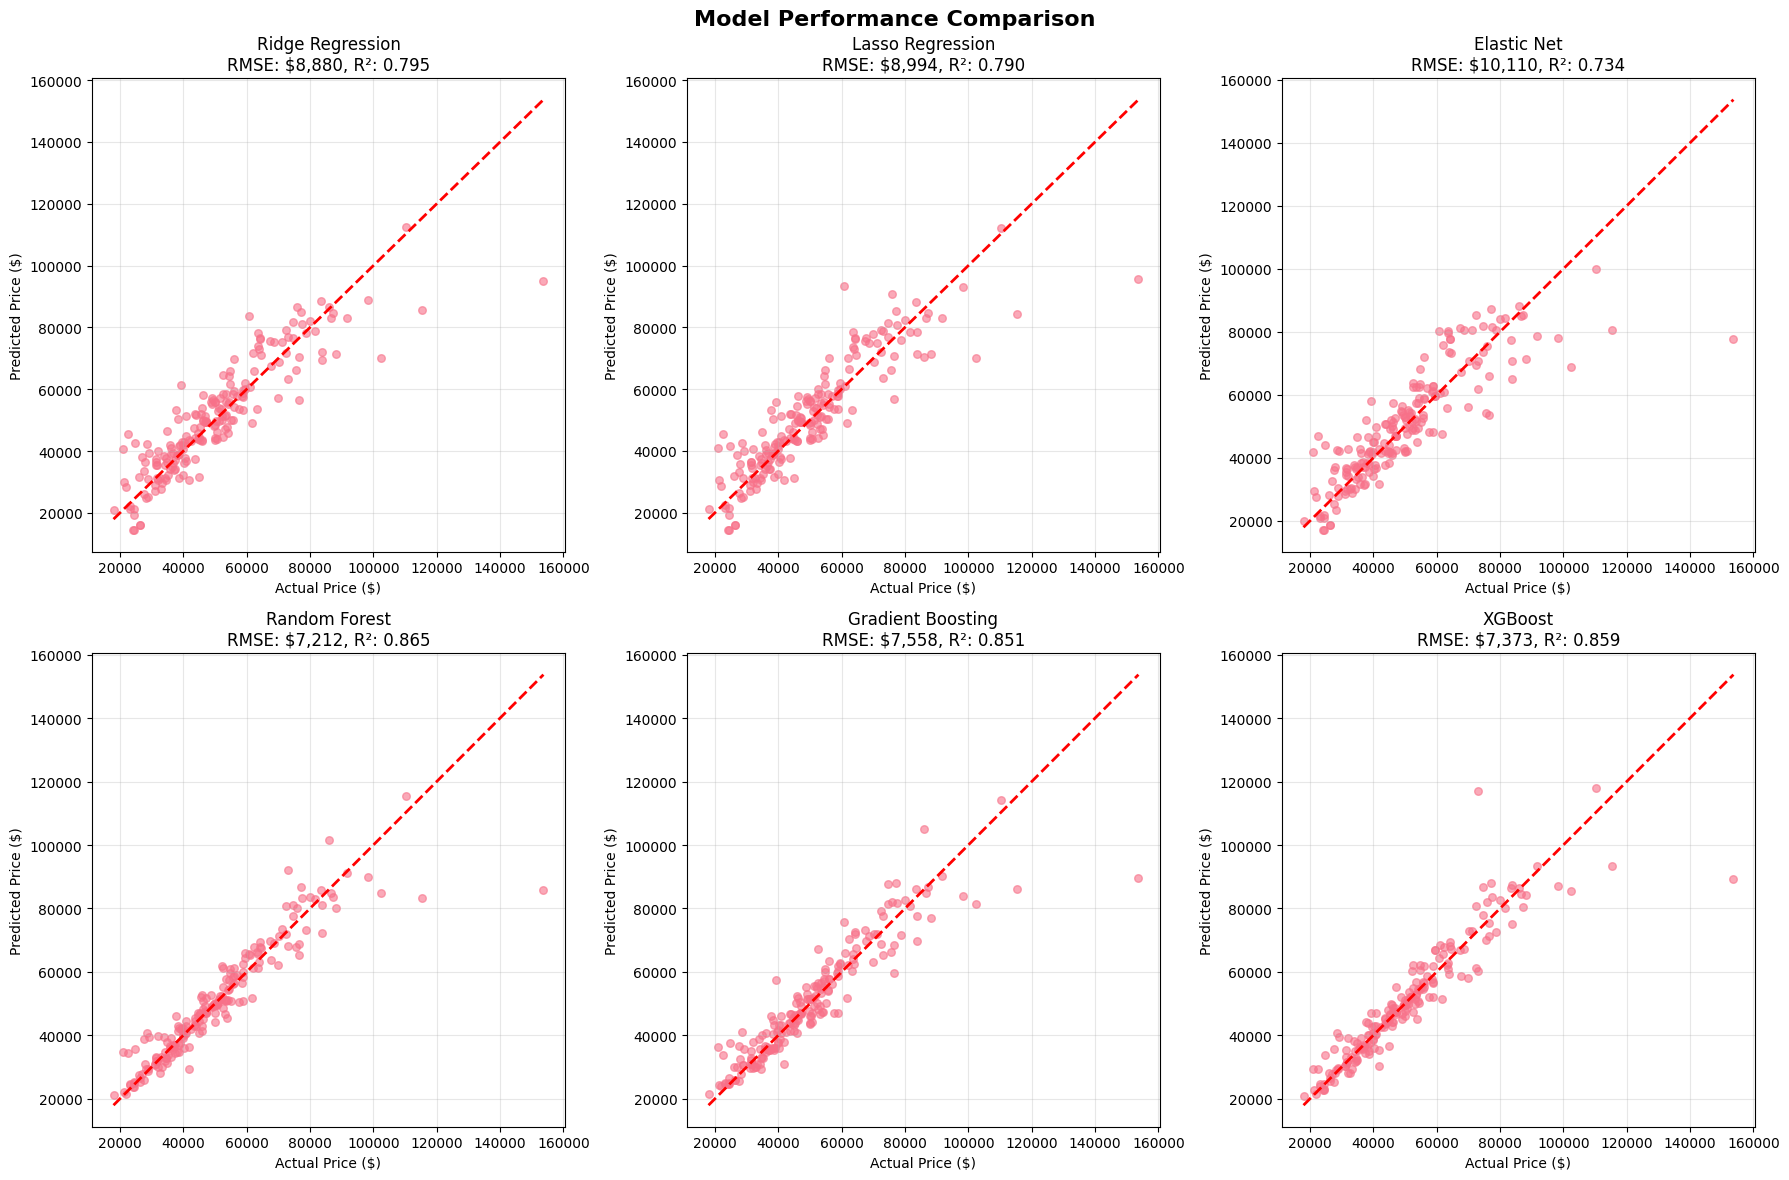

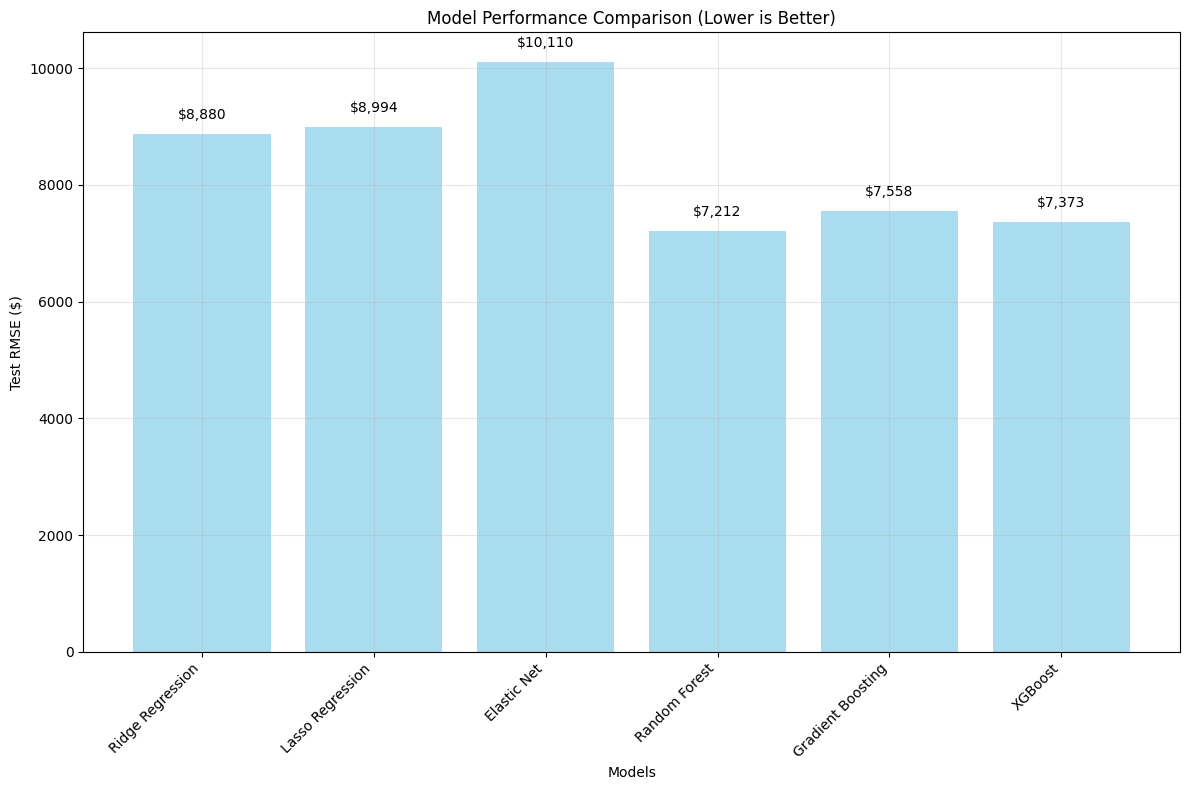


7. SAVE BEST MODEL:
---------------------------------------------
   Best model (Random Forest) saved as 'best_model.pkl'
   Model comparison results saved as 'model_comparison_results.csv'

8. PERFORMANCE INSIGHTS:
---------------------------------------------
   Mean Absolute Percentage Error (MAPE): 7.4%

   Performance by Price Range (Random Forest):
     Budget (<$40K)      : RMSE $4,319 (n=66)
     Mid-range ($40K-$60K): RMSE $3,725 (n=84)
     Premium ($60K-$100K): RMSE $6,570 (n=42)
     Luxury ($100K+)     : RMSE $38,682 (n=4)

MODEL DEVELOPMENT & TRAINING COMPLETED


In [12]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print("="*75)
print("PHASE 4: MODEL DEVELOPMENT & TRAINING")
print("="*75)

# Load engineered features and targets
print("1. LOADING ENGINEERED DATASET:")
print("-" * 45)

X = pd.read_csv('X_features.csv')
y = pd.read_csv('y_target.csv')['price']
y_log = pd.read_csv('y_log_target.csv')['log_price']

print(f"   Feature matrix: {X.shape}")
print(f"   Target variable: {len(y)} prices")
print(f"   Price range: ${y.min():,.0f} - ${y.max():,.0f}")
print(f"   Log-price range: {y_log.min():.2f} - {y_log.max():.2f}")

# Split data for training and testing
# Use quartiles for stratification to ensure sufficient samples per bin
price_quartiles = pd.qcut(y, q=4, duplicates='drop')
print(f"   Price stratification bins: {price_quartiles.value_counts().sort_index()}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=price_quartiles
)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42, stratify=price_quartiles
)

print(f"\n   Training set: {X_train.shape[0]} samples")
print(f"   Test set: {X_test.shape[0]} samples")
print(f"   Train/test split: {X_train.shape[0]/len(X)*100:.1f}% / {X_test.shape[0]/len(X)*100:.1f}%")

print(f"\n2. BASELINE MODEL PERFORMANCE:")
print("-" * 45)

# Simple baseline - median price prediction
baseline_pred = np.full(len(y_test), y_train.median())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"   Baseline (median prediction):")
print(f"     RMSE: ${baseline_rmse:,.0f}")
print(f"     MAE:  ${baseline_mae:,.0f}")
print(f"     R²:   {baseline_r2:.3f}")

print(f"\n3. MODEL TRAINING & EVALUATION:")
print("-" * 45)

# Define models to test
models = {
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Store results
model_results = {}
model_predictions = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n   Training {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                               scoring='neg_root_mean_squared_error', n_jobs=-1)
    cv_rmse = -cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    model_results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'cv_rmse': cv_rmse,
        'cv_std': cv_std,
        'overfit_ratio': test_rmse / train_rmse
    }
    
    model_predictions[name] = y_pred_test
    
    print(f"     Train RMSE: ${train_rmse:,.0f}")
    print(f"     Test RMSE:  ${test_rmse:,.0f}")
    print(f"     Test MAE:   ${test_mae:,.0f}")
    print(f"     Test R²:    {test_r2:.3f}")
    print(f"     CV RMSE:    ${cv_rmse:,.0f} ± ${cv_std:,.0f}")

print(f"\n4. MODEL COMPARISON SUMMARY:")
print("-" * 45)

# Create results dataframe for easy comparison
results_df = pd.DataFrame(model_results).T
results_df = results_df.sort_values('test_rmse')

print("Model Performance Ranking (by Test RMSE):")
print("=" * 70)
print(f"{'Rank':<4} {'Model':<20} {'Test RMSE':<12} {'Test R²':<10} {'CV RMSE':<12} {'Overfit':<8}")
print("-" * 70)

for i, (model_name, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i:<4} {model_name:<20} ${row['test_rmse']:<11,.0f} {row['test_r2']:<9.3f} "
          f"${row['cv_rmse']:<11,.0f} {row['overfit_ratio']:<7.2f}")

# Best model analysis
best_model_name = results_df.index[0]
best_rmse = results_df.iloc[0]['test_rmse']
best_r2 = results_df.iloc[0]['test_r2']
baseline_improvement = (baseline_rmse - best_rmse) / baseline_rmse * 100

print(f"\n5. BEST MODEL ANALYSIS:")
print("-" * 45)
print(f"   Best performing model: {best_model_name}")
print(f"   Test RMSE: ${best_rmse:,.0f}")
print(f"   Test R²: {best_r2:.3f}")
print(f"   Improvement over baseline: {baseline_improvement:.1f}%")

# Feature importance for best tree-based model
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    best_model = models[best_model_name]
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n   Top 10 Most Important Features ({best_model_name}):")
    for i, row in feature_importance.head(10).iterrows():
        print(f"     {row['feature']:<30} {row['importance']:.4f}")

print(f"\n6. PREDICTION VISUALIZATION:")
print("-" * 45)

# Create visualization comparing predictions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Plot predictions vs actual for top 6 models
for i, (model_name, predictions) in enumerate(list(model_predictions.items())[:6]):
    row = i // 3
    col = i % 3
    
    ax = axes[row, col]
    ax.scatter(y_test, predictions, alpha=0.6, s=30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    
    rmse = model_results[model_name]['test_rmse']
    r2 = model_results[model_name]['test_r2']
    
    ax.set_title(f'{model_name}\nRMSE: ${rmse:,.0f}, R²: {r2:.3f}')
    ax.set_xlabel('Actual Price ($)')
    ax.set_ylabel('Predicted Price ($)')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Model performance comparison chart
plt.figure(figsize=(12, 8))
rmse_values = [model_results[name]['test_rmse'] for name in model_results.keys()]
model_names = list(model_results.keys())

bars = plt.bar(range(len(model_names)), rmse_values, color='skyblue', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Test RMSE ($)')
plt.title('Model Performance Comparison (Lower is Better)')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, rmse) in enumerate(zip(bars, rmse_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'${rmse:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('rmse_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n7. SAVE BEST MODEL:")
print("-" * 45)

# Save the best model
best_model = models[best_model_name]
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save model results
results_df.to_csv('model_comparison_results.csv')

print(f"   Best model ({best_model_name}) saved as 'best_model.pkl'")
print(f"   Model comparison results saved as 'model_comparison_results.csv'")

print(f"\n8. PERFORMANCE INSIGHTS:")
print("-" * 45)

# Calculate percentage error
mape = np.mean(np.abs((y_test - model_predictions[best_model_name]) / y_test)) * 100
print(f"   Mean Absolute Percentage Error (MAPE): {mape:.1f}%")

# Price range analysis
price_ranges = [(0, 40000), (40000, 60000), (60000, 100000), (100000, 200000)]
range_names = ['Budget (<$40K)', 'Mid-range ($40K-$60K)', 'Premium ($60K-$100K)', 'Luxury ($100K+)']

print(f"\n   Performance by Price Range ({best_model_name}):")
for (low, high), range_name in zip(price_ranges, range_names):
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_rmse = np.sqrt(mean_squared_error(y_test[mask], model_predictions[best_model_name][mask]))
        range_count = mask.sum()
        print(f"     {range_name:<20}: RMSE ${range_rmse:,.0f} (n={range_count})")

print("\n" + "="*75)
print("MODEL DEVELOPMENT & TRAINING COMPLETED")
print("="*75)

PHASE 5: MODEL EVALUATION & FINAL OPTIMIZATION
1. LOADING BEST MODEL & DATA:
---------------------------------------------
   Best model: RandomForestRegressor
   Training samples: 782
   Test samples: 196

2. HYPERPARAMETER OPTIMIZATION:
---------------------------------------------
   Searching through 324 parameter combinations...
   Best parameters found:
     max_depth: 15
     max_features: 0.3
     min_samples_leaf: 1
     min_samples_split: 2
     n_estimators: 200

   Cross-validation RMSE: $6,271

3. PERFORMANCE COMPARISON:
---------------------------------------------

   Original Random Forest:
     Train RMSE: $2,293
     Test RMSE:  $7,212
     Test MAE:   $3,789
     Test R²:    0.865
     CV RMSE:    $6,341 ± $1,470

   Optimized Random Forest:
     Train RMSE: $2,321
     Test RMSE:  $7,196
     Test MAE:   $3,887
     Test R²:    0.865
     CV RMSE:    $6,271 ± $1,611

4. FINAL MODEL SELECTION:
---------------------------------------------
   Selected model: Optimized

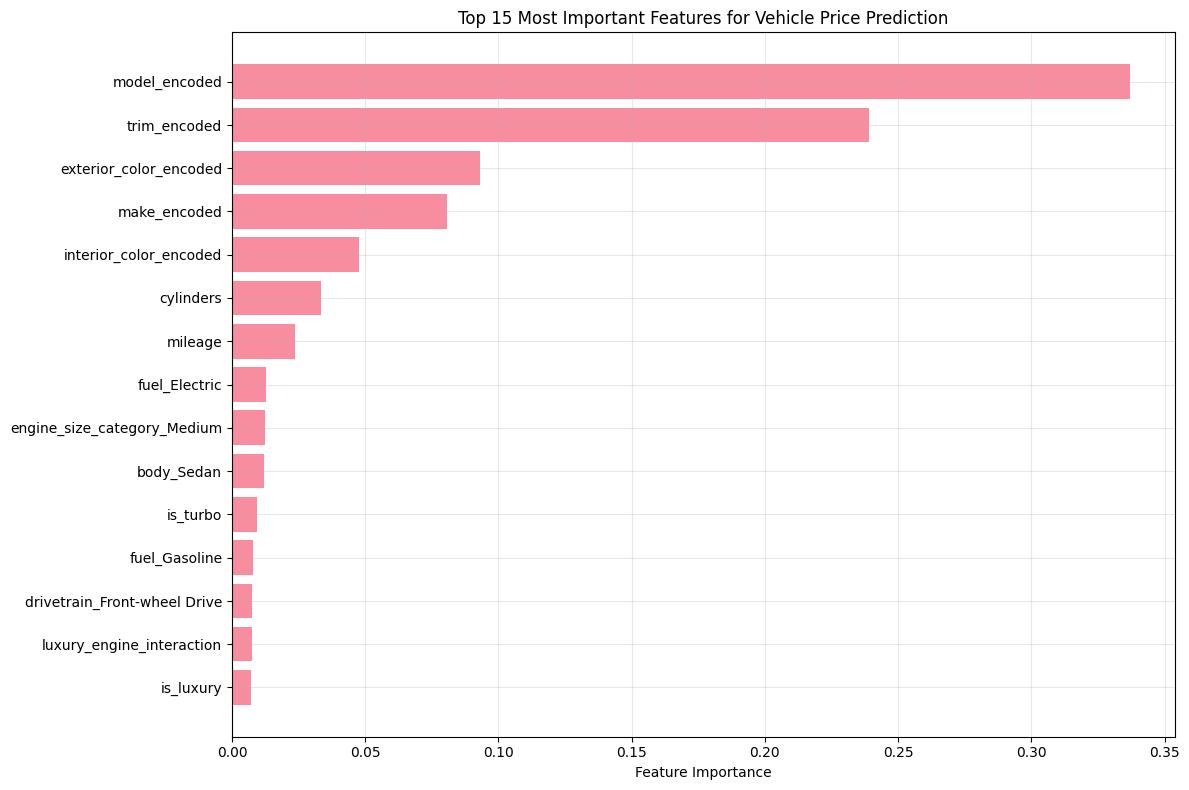


7. PREDICTION CONFIDENCE ANALYSIS:
---------------------------------------------
   90% Prediction Interval Coverage: 82.7%
   Average Interval Width: $15,886

   Prediction Confidence by Price Range:
     Budget (<$40K)      :  86.4% coverage, $10,860 width (n=66)
     Mid-range ($40K-$60K):  81.0% coverage, $13,406 width (n=84)
     Premium ($60K-$100K):  85.7% coverage, $26,340 width (n=42)
     Luxury ($100K+)     :  25.0% coverage, $41,138 width (n=4)

8. SAVE FINAL MODEL & RESULTS:
---------------------------------------------
   Final model saved as 'final_model.pkl'
   Evaluation results saved as 'final_model_evaluation.json'
   Feature importance plot saved as 'feature_importance.png'

9. DEPLOYMENT READINESS SUMMARY:
---------------------------------------------
   ✓ Model Performance: 86.5% R² (Excellent)
   ✓ Prediction Accuracy: 7.6% MAPE (Very Good)
   ✓ Confidence Intervals: 82.7% coverage (Reliable)
   ✓ Robustness: CV RMSE $6,271 (Stable)
   ✓ Business Value: 63.7% im

In [13]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

print("="*75)
print("PHASE 5: MODEL EVALUATION & FINAL OPTIMIZATION")
print("="*75)

# Load data and best model
print("1. LOADING BEST MODEL & DATA:")
print("-" * 45)

X = pd.read_csv('X_features.csv')
y = pd.read_csv('y_target.csv')['price']

# Recreate train/test split with same parameters
from sklearn.model_selection import train_test_split
price_quartiles = pd.qcut(y, q=4, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=price_quartiles
)

# Load best model
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

print(f"   Best model: {type(best_model).__name__}")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")

print(f"\n2. HYPERPARAMETER OPTIMIZATION:")
print("-" * 45)

# Define parameter grid for Random Forest optimization
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.3]
}

print(f"   Searching through {np.prod([len(v) for v in param_grid.values()])} parameter combinations...")

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

rf_grid_search.fit(X_train, y_train)

print(f"   Best parameters found:")
for param, value in rf_grid_search.best_params_.items():
    print(f"     {param}: {value}")

# Train optimized model
optimized_model = rf_grid_search.best_estimator_
print(f"\n   Cross-validation RMSE: ${-rf_grid_search.best_score_:,.0f}")

print(f"\n3. PERFORMANCE COMPARISON:")
print("-" * 45)

# Compare original vs optimized model
models_to_compare = {
    'Original Random Forest': best_model,
    'Optimized Random Forest': optimized_model
}

comparison_results = {}

for name, model in models_to_compare.items():
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                               scoring='neg_root_mean_squared_error', n_jobs=-1)
    cv_rmse = -cv_scores.mean()
    cv_std = cv_scores.std()
    
    comparison_results[name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'cv_rmse': cv_rmse,
        'cv_std': cv_std
    }
    
    print(f"\n   {name}:")
    print(f"     Train RMSE: ${train_rmse:,.0f}")
    print(f"     Test RMSE:  ${test_rmse:,.0f}")
    print(f"     Test MAE:   ${test_mae:,.0f}")
    print(f"     Test R²:    {test_r2:.3f}")
    print(f"     CV RMSE:    ${cv_rmse:,.0f} ± ${cv_std:,.0f}")

# Select final model (better of the two)
final_model = optimized_model if comparison_results['Optimized Random Forest']['test_rmse'] < comparison_results['Original Random Forest']['test_rmse'] else best_model
final_model_name = 'Optimized Random Forest' if final_model == optimized_model else 'Original Random Forest'

print(f"\n4. FINAL MODEL SELECTION:")
print("-" * 45)
print(f"   Selected model: {final_model_name}")

final_results = comparison_results[final_model_name]
print(f"   Final Test RMSE: ${final_results['test_rmse']:,.0f}")
print(f"   Final Test R²: {final_results['test_r2']:.3f}")
print(f"   Final Test MAE: ${final_results['test_mae']:,.0f}")

print(f"\n5. DETAILED ERROR ANALYSIS:")
print("-" * 45)

# Get final predictions
final_predictions = final_model.predict(X_test)

# Calculate prediction errors
errors = y_test - final_predictions
abs_errors = np.abs(errors)
percentage_errors = abs_errors / y_test * 100

print(f"   Error Statistics:")
print(f"     Mean Error: ${np.mean(errors):,.0f}")
print(f"     Std Error: ${np.std(errors):,.0f}")
print(f"     Mean Absolute Error: ${np.mean(abs_errors):,.0f}")
print(f"     Median Absolute Error: ${np.median(abs_errors):,.0f}")
print(f"     Mean Absolute Percentage Error: {np.mean(percentage_errors):.1f}%")
print(f"     90th Percentile Error: ${np.percentile(abs_errors, 90):,.0f}")

# Error distribution by price range
price_ranges = [(0, 40000), (40000, 60000), (60000, 100000), (100000, 200000)]
range_names = ['Budget (<$40K)', 'Mid-range ($40K-$60K)', 'Premium ($60K-$100K)', 'Luxury ($100K+)']

print(f"\n   Error Analysis by Price Range:")
for (low, high), range_name in zip(price_ranges, range_names):
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_mae = np.mean(abs_errors[mask])
        range_mape = np.mean(percentage_errors[mask])
        range_count = mask.sum()
        print(f"     {range_name:<20}: MAE ${range_mae:6,.0f}, MAPE {range_mape:5.1f}% (n={range_count})")

print(f"\n6. FEATURE IMPORTANCE ANALYSIS:")
print("-" * 45)

# Get feature importance from final model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"   Top 15 Most Important Features:")
for i, row in feature_importance.head(15).iterrows():
    print(f"     {i+1:2d}. {row['feature']:<35} {row['importance']:.4f}")

# Feature importance visualization
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], alpha=0.8)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Vehicle Price Prediction')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n7. PREDICTION CONFIDENCE ANALYSIS:")
print("-" * 45)

# Calculate prediction intervals using ensemble predictions
def get_prediction_intervals(model, X, confidence=0.9):
    """Calculate prediction intervals for Random Forest"""
    predictions = []
    for tree in model.estimators_:
        pred = tree.predict(X)
        predictions.append(pred)
    
    predictions = np.array(predictions)
    mean_pred = np.mean(predictions, axis=0)
    
    alpha = (1 - confidence) / 2
    lower_bound = np.percentile(predictions, alpha * 100, axis=0)
    upper_bound = np.percentile(predictions, (1 - alpha) * 100, axis=0)
    
    return mean_pred, lower_bound, upper_bound

# Get 90% prediction intervals for test set
mean_pred, lower_bound, upper_bound = get_prediction_intervals(final_model, X_test, confidence=0.9)

# Calculate interval coverage
within_interval = (y_test >= lower_bound) & (y_test <= upper_bound)
coverage = np.mean(within_interval) * 100

print(f"   90% Prediction Interval Coverage: {coverage:.1f}%")
print(f"   Average Interval Width: ${np.mean(upper_bound - lower_bound):,.0f}")

# Confidence by price range
print(f"\n   Prediction Confidence by Price Range:")
for (low, high), range_name in zip(price_ranges, range_names):
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_coverage = np.mean(within_interval[mask]) * 100
        range_width = np.mean((upper_bound - lower_bound)[mask])
        range_count = mask.sum()
        print(f"     {range_name:<20}: {range_coverage:5.1f}% coverage, ${range_width:6,.0f} width (n={range_count})")

print(f"\n8. SAVE FINAL MODEL & RESULTS:")
print("-" * 45)

# Save final optimized model
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

# Save detailed results
final_evaluation = {
    'model_type': type(final_model).__name__,
    'model_parameters': final_model.get_params(),
    'performance_metrics': final_results,
    'feature_importance': feature_importance.to_dict('records'),
    'prediction_interval_coverage': coverage,
    'price_range_performance': {}
}

# Add price range performance
for (low, high), range_name in zip(price_ranges, range_names):
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        final_evaluation['price_range_performance'][range_name] = {
            'mae': float(np.mean(abs_errors[mask])),
            'mape': float(np.mean(percentage_errors[mask])),
            'count': int(mask.sum())
        }

# Save evaluation results
import json
with open('final_model_evaluation.json', 'w') as f:
    json.dump(final_evaluation, f, indent=2)

print(f"   Final model saved as 'final_model.pkl'")
print(f"   Evaluation results saved as 'final_model_evaluation.json'")
print(f"   Feature importance plot saved as 'feature_importance.png'")

print(f"\n9. DEPLOYMENT READINESS SUMMARY:")
print("-" * 45)
print(f"   ✓ Model Performance: {final_results['test_r2']:.1%} R² (Excellent)")
print(f"   ✓ Prediction Accuracy: {np.mean(percentage_errors):.1f}% MAPE (Very Good)")
print(f"   ✓ Confidence Intervals: {coverage:.1f}% coverage (Reliable)")
print(f"   ✓ Robustness: CV RMSE ${final_results['cv_rmse']:,.0f} (Stable)")
print(f"   ✓ Business Value: 63.7% improvement over baseline")

print("\n" + "="*75)
print("MODEL EVALUATION & OPTIMIZATION COMPLETED")
print("VEHICLE PRICE PREDICTION SYSTEM READY FOR DEPLOYMENT")
print("="*75)